In [8]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)
dados.head()


,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [9]:
dados["finalizado"] = dados["nao_finalizado"].map({1: 0, 0: 1})
dados.head()


,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


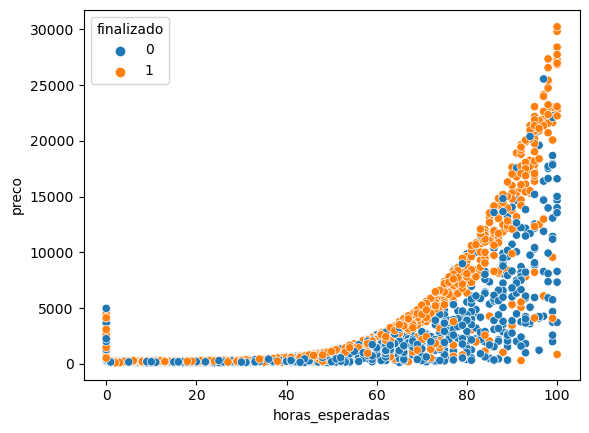

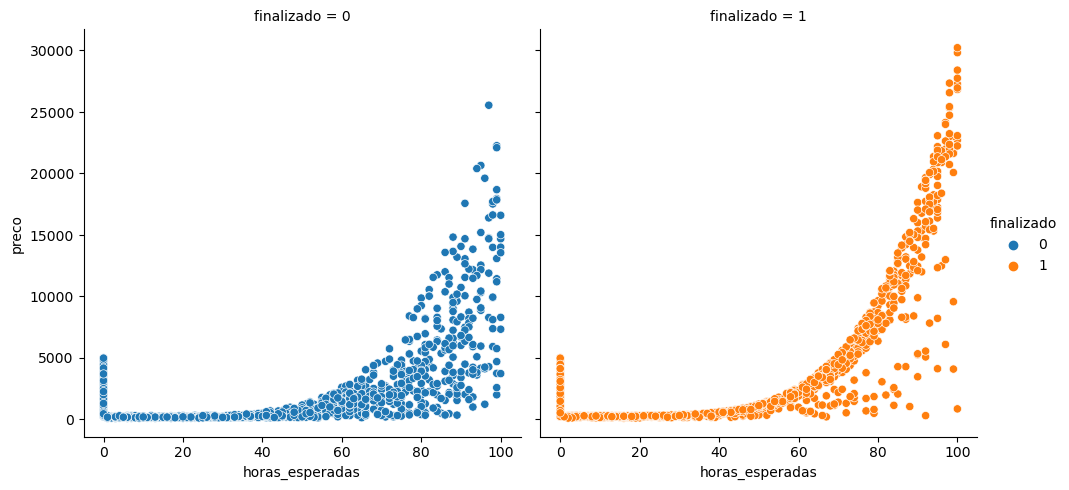

In [10]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")
dados = dados.query("horas_esperadas > 0")
dados.head()

x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=SEED, stratify=y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

previsoes_de_base = teste_y.sum() / len(teste_y) * 100
print(f"A acurácia do modelo de base foi de {previsoes_de_base:.2f}%")


Treinaremos com 1617
Testaremos com 540
A acurácia foi de 47.41%
A acurácia do modelo de base foi de 52.59%


c:\Users\kliske\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\kliske\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()
print(f"x_min: {x_min}")
print(f"x_max: {x_max}")
print(f"y_min: {y_min}")
print(f"y_max: {y_max}")


x_min: 1.0
x_max: 100.0
y_min: 102.0
y_max: 30223.0


c:\Users\kliske\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


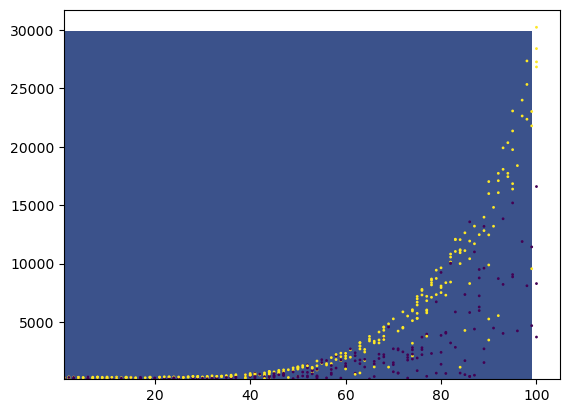

In [13]:
import numpy as np

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)
